# solution 1

In [5]:
# Basic information of alarms
# viz the graph

# Try TTPM Method
# Try notears
# Try another method in book



In [6]:
# S_1_2 notears

In [7]:
# s_1_3的思路，进行一些预处理，把预处理中明显异常的部分进行去除，保证后续causality的顺利

In [8]:
from preprocess import *

In [9]:
import os
import numpy as np
import pandas as pd

import os
# os.path.abspath('.')

In [10]:
import plotly.express as px
import plotly.graph_objects as go


# Read Data

In [11]:
dataset = 'dataset_1'

# alarm data
alarms = pd.read_csv(r'./datasets/dataset_1/alarm.csv')
# causal_prior
causal_prior= np.load(r'./datasets/dataset_1/causal_prior.npy')

# topology
topology = np.load(r'./datasets/dataset_1/topology.npy')

# rca
rca_prior = pd.read_csv(r'./datasets/dataset_1/rca_prior.csv')

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
print(f"shape of topology prior matrix: {topology.shape}")
print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (141853, 4)
shape of causal prior matrix: (39, 39)
shape of topology prior matrix: (35, 35)
shape of rca prior matrix: (49, 2)


In [12]:
dataset = 'dataset_1'

# alarm data
alarms = pd.read_csv(r'./datasets/{}/alarm.csv'.format(dataset))
# causal_prior
causal_prior= np.load(r'./datasets/{}/causal_prior.npy'.format(dataset))

# topology
topology = np.load(r'./datasets/{}/topology.npy'.format(dataset))

# rca
rca_prior = pd.read_csv(r'./datasets/{}/rca_prior.csv'.format(dataset))

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
print(f"shape of topology prior matrix: {topology.shape}")
print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (141853, 4)
shape of causal prior matrix: (39, 39)
shape of topology prior matrix: (35, 35)
shape of rca prior matrix: (49, 2)


In [19]:
pre_sololution = '01_topo_only_winsize_500'
samples1 = make_sample_based_on_topo(alarms, topology, win_size=[500], remove_outlier=False)

# create a folder if not exist
if not os.path.exists('./datasets_processed/{}'.format(pre_sololution)):
    os.makedirs('./datasets_processed/{}'.format(pre_sololution))

samples1.to_csv('./datasets_processed/{}/{}.csv'.format(pre_sololution,dataset), index=False, )

Looking for connected, Processing device: 0 Number of Connected: 13
Number of alarms connected: 52561 Percentage 0.37
Window size 500 Total 52561 alarms
Looking for connected, Processing device: 1 Number of Connected: 22
Number of alarms connected: 96960 Percentage 0.68
Window size 500 Total 96960 alarms
Looking for connected, Processing device: 2 Number of Connected: 17
Number of alarms connected: 75667 Percentage 0.53
Window size 500 Total 75667 alarms
Looking for connected, Processing device: 3 Number of Connected: 19
Number of alarms connected: 91334 Percentage 0.64
Window size 500 Total 91334 alarms
Looking for connected, Processing device: 4 Number of Connected: 7
Number of alarms connected: 21662 Percentage 0.15
Window size 500 Total 21662 alarms
Looking for connected, Processing device: 5 Number of Connected: 17
Number of alarms connected: 80073 Percentage 0.56
Window size 500 Total 80073 alarms
Looking for connected, Processing device: 6 Number of Connected: 13
Number of alarm

# EDA and Preprocessing

In [12]:
# How is the alarm data organized?
# How does it looks like

In [13]:
alarms.head()

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68


In [14]:
# turn alarm_id and device_id into categorical data
alarms['alarm_id'] = alarms['alarm_id'].astype('category')
alarms['device_id'] = alarms['device_id'].astype('category')

In [15]:
alarms.shape

(132688, 4)

In [16]:
# is the alarm random?

alarms.groupby('alarm_id').count()

,device_id,start_timestamp,end_timestamp
alarm_id,,,
0,312,312,312
1,2319,2319,2319
2,2745,2745,2745
3,835,835,835
4,604,604,604
5,838,838,838
6,7600,7600,7600
7,4568,4568,4568
8,2110,2110,2110


In [17]:
# random select
alarms_sample = alarms.sample(n=10000, random_state=1)

# view of device_id
px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='device_id')

In [18]:
# view of alarm_id
px.scatter(alarms_sample, y='alarm_id', x='start_timestamp', color='alarm_id')

In [19]:
# view together

px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='alarm_id')


## 预处理1： Device 以及报警的联系

In [20]:
## count of device and alarm
device_alarm_count = alarms.groupby(['device_id','alarm_id'])['start_timestamp'].count().unstack()
device_alarm_count

alarm_id,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
device_id,,,,,,,,,,,,,,,,,,,,,
0,0,275,0,0,83,41,373,0,0,131,...,0,51,94,0,176,0,0,0,0,141
1,0,0,142,110,73,0,282,0,156,124,...,0,0,0,0,27,0,80,0,0,73
2,0,275,0,0,63,43,351,0,0,131,...,0,48,84,0,152,0,0,0,0,113
3,0,0,0,18,0,10,62,42,20,0,...,73,7,0,61,25,0,68,20,0,16
4,0,126,0,0,36,25,148,0,0,44,...,0,21,38,0,100,0,0,0,0,73
5,0,0,0,128,0,64,528,441,107,0,...,943,57,0,264,131,0,597,122,0,65
6,0,0,0,0,0,0,77,0,0,43,...,0,19,0,0,0,0,0,0,0,0
7,0,0,0,47,0,29,136,139,57,0,...,147,22,0,136,28,0,84,72,0,39
8,0,0,102,60,55,0,226,0,63,91,...,0,0,0,0,125,0,377,0,0,60


In [21]:
d_a_matrix = alarms.groupby(['device_id','alarm_id'])['start_timestamp'].count().reset_index()
d_a_matrix.rename(columns={'start_timestamp':'count'}, inplace=True)
d_a_matrix['is_0'] = d_a_matrix['count'].apply(lambda x: 1 if x==0 else 0)
d_a_matrix

,device_id,alarm_id,count,is_0
0,0,0,0,1
1,0,1,275,0
2,0,2,0,1
3,0,3,0,1
4,0,4,83,0
...,...,...,...,...
2053,41,44,0,1
2054,41,45,390,0
2055,41,46,0,1
2056,41,47,0,1


In [22]:
# 并不是所有的报警都出现在所有的设备上
px.scatter(d_a_matrix, y='device_id', x='alarm_id', color='is_0',width=600,height=600)

In [23]:
##  对于设备进行分类，把出现过相同报警的设备分为一类


device_alarm_count_bin = device_alarm_count.apply(lambda x: x>0)
# device_alarm_count_bin.reset_index(inplace=True)
device_alarm_count_bin['tag'] = 'repeated'

## 具备相同false, true的分为一类，标记一下类型
device_alarm_type_unique = device_alarm_count_bin.drop_duplicates()
device_alarm_type_unique.reset_index(inplace=True)
device_alarm_type_unique.rename(columns={'device_id':'device_id_unique'})
device_alarm_type_unique['tag_unique'] = 'Unique'


# device_alarm_count_bin.reset_index(inplace=True)

device_mapped = pd.merge(device_alarm_count_bin, device_alarm_type_unique, how='left')
device_mapped.rename(columns={'device_id':'device_type_mapped'}, inplace=True)
device_mapped.reset_index(inplace=True)
device_mapped.rename(columns={'index':'device_id'}, inplace=True)
device_mapped

# 重新填充device_id

/var/folders/5r/tzcqr9wx0n9f9901lytz5c7m0000gn/T/ipykernel_45760/567439526.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



alarm_id,device_id,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,tag,device_type_mapped,tag_unique
0,0,False,True,False,False,True,True,True,False,False,...,False,True,False,False,False,False,True,repeated,0,Unique
1,1,False,False,True,True,True,False,True,False,True,...,False,True,False,True,False,False,True,repeated,1,Unique
2,2,False,True,False,False,True,True,True,False,False,...,False,True,False,False,False,False,True,repeated,0,Unique
3,3,False,False,False,True,False,True,True,True,True,...,True,True,False,True,True,False,True,repeated,3,Unique
4,4,False,True,False,False,True,True,True,False,False,...,False,True,False,False,False,False,True,repeated,0,Unique
5,5,False,False,False,True,False,True,True,True,True,...,True,True,False,True,True,False,True,repeated,3,Unique
6,6,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,repeated,6,Unique
7,7,False,False,False,True,False,True,True,True,True,...,True,True,False,True,True,False,True,repeated,3,Unique
8,8,False,False,True,True,True,False,True,False,True,...,False,True,False,True,False,False,True,repeated,1,Unique
9,9,False,False,True,True,True,False,True,False,True,...,False,True,False,True,False,False,True,repeated,1,Unique


In [34]:
# 看下这些是不是还能够合并
device_alarm_type_unique

alarm_id,device_id,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,tag,tag_unique
0,0,False,True,False,False,True,True,True,False,False,...,True,False,True,False,False,False,False,True,repeated,Unique
1,1,False,False,True,True,True,False,True,False,True,...,False,False,True,False,True,False,False,True,repeated,Unique
2,3,False,False,False,True,False,True,True,True,True,...,False,True,True,False,True,True,False,True,repeated,Unique
3,6,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,repeated,Unique
4,10,False,True,True,False,False,False,True,False,False,...,False,False,False,True,True,False,True,False,repeated,Unique
5,11,True,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,True,False,repeated,Unique
6,13,False,False,False,False,False,True,False,True,True,...,True,False,True,False,False,False,True,True,repeated,Unique
7,15,True,True,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,repeated,Unique
8,17,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,repeated,Unique


In [35]:
# 看下来整体重复的不高，不继续进行了，
# df = device_alarm_type_unique.copy()
# from itertools import combinations 

# def calc_dup_ratio(row1, row2):
#     matches = sum(row1 == row2)
#     return matches / len(row1)
    
# ratios = []
# for i, j in combinations(df.index, 2):
#     row1 = df.iloc[i] 
#     row2 = df.iloc[j]
#     ratios.append(calc_dup_ratio(row1, row2))
# ratios

In [36]:
### Save device mapping to csv
device_mapped.to_csv('./datasets/{}/device_mapped.csv'.format(dataset), index=False)

In [37]:
alarms

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68
...,...,...,...,...
132683,38,25,604716,604725
132684,33,20,604718,604725
132685,17,9,604720,604800
132686,17,4,604757,604796


In [38]:
alarms

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68
...,...,...,...,...
132683,38,25,604716,604725
132684,33,20,604718,604725
132685,17,9,604720,604800
132686,17,4,604757,604796


In [39]:
d_a_matrix

,device_id,alarm_id,count,is_0
0,0,0,0,1
1,0,1,275,0
2,0,2,0,1
3,0,3,0,1
4,0,4,83,0
...,...,...,...,...
2053,41,44,0,1
2054,41,45,390,0
2055,41,46,0,1
2056,41,47,0,1


In [40]:
## 对归类以后的设备进行正则化处理

for device_type in device_mapped['device_type_mapped'].unique():
    
    print("Working on device type: {}".format(device_type))
    
    

Working on device type: 0
Working on device type: 1
Working on device type: 3
Working on device type: 6
Working on device type: 10
Working on device type: 11
Working on device type: 13
Working on device type: 15
Working on device type: 17


In [41]:
d_a_matrix

,device_id,alarm_id,count,is_0
0,0,0,0,1
1,0,1,275,0
2,0,2,0,1
3,0,3,0,1
4,0,4,83,0
...,...,...,...,...
2053,41,44,0,1
2054,41,45,390,0
2055,41,46,0,1
2056,41,47,0,1


In [42]:
px.histogram(d_a_matrix, x='count',nbins=1400)

In [45]:
# px.scatter(d_a_matrix, y='device_id', x='alarm_id', color='start_timestamp')

## 查看Topology

In [46]:
### Typology 是不是和devicetype能够展示不同的视角

topology

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [47]:
df_topo = pd.DataFrame(topology)
df_topo.reset_index(inplace=True)
df_topo.rename(columns={'index':'device_id'}, inplace=True)
df_topo

,device_id,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
7,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
8,8,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
9,9,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [48]:
df_topo_mapped = pd.merge(df_topo, device_mapped[['device_id','device_type_mapped']], how='left',on='device_id')
df_topo_mapped

,device_id,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,device_type_mapped
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,3
4,4,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,3
6,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,6
7,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,3
8,8,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
9,9,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1


In [49]:
import matplotlib.pyplot as plt

device_unique = df_topo_mapped['device_type_mapped'].unique()
num_colors = df_topo_mapped['device_type_mapped'].nunique()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_colors] 
colors_dict = dict(zip(device_unique, colors))
color_sequence = df_topo_mapped['device_type_mapped'].apply(lambda x: colors_dict.get(x))
color_sequence

0     #1f77b4
1     #ff7f0e
2     #1f77b4
3     #2ca02c
4     #1f77b4
5     #2ca02c
6     #d62728
7     #2ca02c
8     #ff7f0e
9     #ff7f0e
10    #9467bd
11    #8c564b
12    #9467bd
13    #e377c2
14    #e377c2
15    #7f7f7f
16    #9467bd
17    #bcbd22
18    #8c564b
19    #2ca02c
20    #9467bd
21    #e377c2
22    #2ca02c
23    #7f7f7f
24    #9467bd
25    #8c564b
26    #e377c2
27    #bcbd22
28    #1f77b4
29    #e377c2
30    #1f77b4
31    #bcbd22
32    #9467bd
33    #8c564b
34    #9467bd
35    #8c564b
36    #1f77b4
37    #8c564b
38    #2ca02c
39    #ff7f0e
40    #e377c2
41    #ff7f0e
Name: device_type_mapped, dtype: object

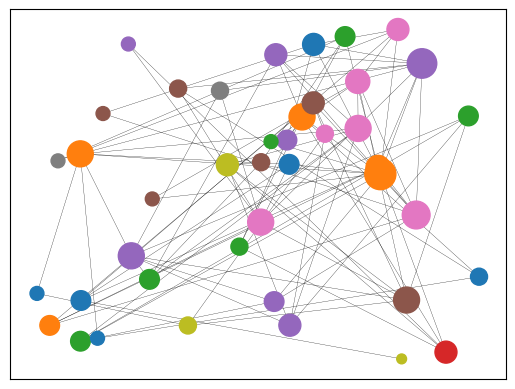

In [50]:
import networkx as nx
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

X= topology

# 层次聚类  
# Z = linkage(X, 'single')  
# cluster_idxs = fcluster(Z, 3, criterion='maxclust')

# 
device_types = df_topo_mapped['device_type_mapped']

# 定义颜色和标记  
colors = ['r', 'g', 'b']

markers = ['o', 'v', '^']

markers = ['so^>v<dph8']

# 绘制网络图
G = nx.from_numpy_array(X)
pos = nx.spring_layout(G,
                       threshold = 1,
                       scale=3) 

# 绘制节点,大小与度数相关
node_size = [G.degree(i)*50 for i in G.nodes()]  

# nx.draw_networkx_nodes(G, pos, node_size=node_size)

nx.draw_networkx_nodes(G, pos, node_size=node_size, 
                       node_color=color_sequence,
                       label=device_types,
                     #   node_shape=device_types,
                       margins=0.01 # smaller margin, bigger gap
                       
                    #    node_shape=[markers[i] for i in cluster_idxs]
                       )

# 绘制边,宽度与权重相关 
edge_width = [ 0.2*G[u][v]['weight'] for u,v in G.edges()]  
nx.draw_networkx_edges(G, pos, width=edge_width) 

# plt.legend()
plt.show()

## 基于Topo构建数据集

In [51]:
alarms

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68
...,...,...,...,...
132683,38,25,604716,604725
132684,33,20,604718,604725
132685,17,9,604720,604800
132686,17,4,604757,604796


In [52]:
make_window_sample(alarms, win_size=300)

Window size 300 Total 132688 removed 28215 alarms
Window size 300 Total 104473 alarms


alarm_id,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
win_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,1,...,1,0,1,1,0,0,1,0,2,0
1,0,0,0,1,0,1,1,1,1,2,...,3,0,0,0,1,0,0,0,7,0
2,0,5,1,0,0,1,3,1,2,1,...,5,1,0,0,3,0,5,0,5,0
4,0,0,0,0,0,0,1,2,0,0,...,3,0,0,0,0,1,1,1,1,0
5,0,0,0,0,2,0,2,1,0,0,...,5,0,0,0,1,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0,0,0,0,0,0,1,0,0,1,...,4,0,0,0,1,1,0,0,1,1
2011,1,2,1,1,1,2,4,3,2,1,...,1,0,0,0,3,2,0,0,3,4
2013,0,3,0,0,1,0,0,0,0,0,...,2,0,0,0,1,3,4,0,0,0


In [53]:
device_count = len(topology)


In [55]:


for start in range(device_count):

    connected = start_with_x(topology, start)

    print("Looking for connected, Processing device: {} Number of Connected: {}".format(start, len(connected)))

    alarms_connected = alarms[alarms['device_id'].isin(connected)]

    print("Number of alarms connected: {} Percentage {:.2f}".format(alarms_connected.shape[0], alarms_connected.shape[0]/alarms.shape[0]))

    window_sample = make_window_sample(alarms_connected, win_size=300)
    
    

    samples = make_window_sample_multi(alarms_connected, remove_outlier=False)


Looking for connected, Processing device: 0 Number of Connected: 12
Number of alarms connected: 46696 Percentage 0.35
Window size 300 Total 46696 removed 10881 alarms
Window size 300 Total 35815 alarms
Window size 450 Total 46696 alarms
Window size 900 Total 46696 alarms
Window size 1500 Total 46696 alarms
Looking for connected, Processing device: 1 Number of Connected: 19
Number of alarms connected: 66774 Percentage 0.50
Window size 300 Total 66774 removed 14774 alarms
Window size 300 Total 52000 alarms
Window size 450 Total 66774 alarms
Window size 900 Total 66774 alarms
Window size 1500 Total 66774 alarms
Looking for connected, Processing device: 2 Number of Connected: 22
Number of alarms connected: 74255 Percentage 0.56
Window size 300 Total 74255 removed 16240 alarms
Window size 300 Total 58015 alarms
Window size 450 Total 74255 alarms
Window size 900 Total 74255 alarms
Window size 1500 Total 74255 alarms
Looking for connected, Processing device: 3 Number of Connected: 16
Number o

# 提前预处理

In [56]:
# 在这里把数据都处理一下以后把samples 保存下来

import importlib
import preprocess
importlib.reload(preprocess)
from preprocess import *


In [57]:
samples1 = make_sample_based_on_topo(alarms, topology, win_size=300, remove_outlier=False)
samples1.to_csv('./datasets_processed/{}/dataset2.csv'.format(pre_sololution), index=False)

Looking for connected, Processing device: 0 Number of Connected: 12
Number of alarms connected: 46696 Percentage 0.35
Window size 450 Total 46696 alarms
Window size 900 Total 46696 alarms
Window size 1500 Total 46696 alarms
Looking for connected, Processing device: 1 Number of Connected: 19
Number of alarms connected: 66774 Percentage 0.50
Window size 450 Total 66774 alarms
Window size 900 Total 66774 alarms
Window size 1500 Total 66774 alarms
Looking for connected, Processing device: 2 Number of Connected: 22
Number of alarms connected: 74255 Percentage 0.56
Window size 450 Total 74255 alarms
Window size 900 Total 74255 alarms
Window size 1500 Total 74255 alarms
Looking for connected, Processing device: 3 Number of Connected: 16
Number of alarms connected: 59653 Percentage 0.45
Window size 450 Total 59653 alarms
Window size 900 Total 59653 alarms
Window size 1500 Total 59653 alarms
Looking for connected, Processing device: 4 Number of Connected: 10
Number of alarms connected: 34087 Pe

alarm_id,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
win_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,2,1,1,0,0,1,0,1,1,...,1,1,0,0,3,0,1,0,5,0
2,0,1,1,0,0,0,4,3,0,0,...,0,0,0,0,1,3,3,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,2,0,0,2,0
4,0,0,2,0,0,0,1,4,0,0,...,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,5,5,2,1,3,9,9,3,1,...,1,1,2,2,5,6,8,0,9,3
400,1,2,2,4,3,2,16,14,4,2,...,7,0,1,3,9,3,6,2,8,6
401,1,10,1,1,1,5,25,10,2,5,...,8,0,4,1,12,6,16,1,13,5


In [60]:
pre_sololution = '01_topo'
samples1.to_csv('./datasets_processed/{}/dataset2.csv'.format(pre_sololution), index=False)

In [58]:
samples1

alarm_id,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
win_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,2,1,1,0,0,1,0,1,1,...,1,1,0,0,3,0,1,0,5,0
2,0,1,1,0,0,0,4,3,0,0,...,0,0,0,0,1,3,3,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,2,0,0,2,0
4,0,0,2,0,0,0,1,4,0,0,...,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,5,5,2,1,3,9,9,3,1,...,1,1,2,2,5,6,8,0,9,3
400,1,2,2,4,3,2,16,14,4,2,...,7,0,1,3,9,3,6,2,8,6
401,1,10,1,1,1,5,25,10,2,5,...,8,0,4,1,12,6,16,1,13,5


# Show prior matrix

In [ ]:
causal_prior.shape,rca_prior.shape,topology.shape

((49, 49), (47, 2), (42, 42))

In [ ]:
causal_prior

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
topology

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
rca_prior

,simplified_snapshot,simplified_root_cause
0,"(2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, ...",10
1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",5
2,"(1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...",5
3,"(0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 18,...",5
4,"(0, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",10
5,"(0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, ...",5
6,"(0, 1, 2, 5, 6, 9, 10, 12, 13, 18, 19, 20, 21,...",5
7,"(0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 16, 1...",0
8,"(5, 7, 8, 9, 10, 13, 14, 15, 18, 19, 20, 21, 2...",5
9,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",5


In [ ]:
# !pip install pyvis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import networkx as nx
from castle.metrics import MetricsDAG
from castle.common import GraphDAG

In [ ]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [ ]:
# too many nodes, not readable
g = nx.DiGraph(causal_prior)

# plt.figure(figsize=(12, 8))
# nx.draw(
#     G=g,
#     node_color=COLORS[0],
#     node_size=1200,
#     arrowsize=17,
#     with_labels=True,
#     font_color='white',
#     font_size=21,
#     pos=nx.circular_layout(g)
# )

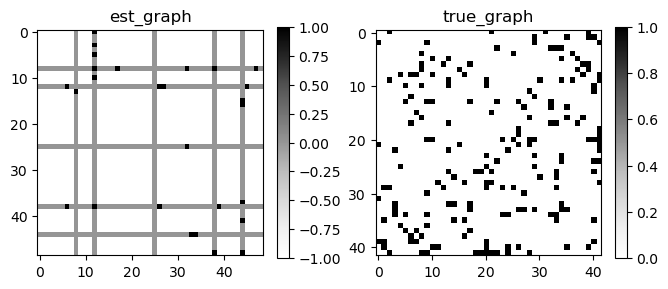

In [ ]:
GraphDAG(
    est_dag=causal_prior, 
    true_dag=topology
    )

plt.show()

In [ ]:

# from pyvis.network import Network

# prior_net = Network("500px", "900px", notebook=True, directed=True, layout=False)

# prior_g = nx.from_numpy_matrix(causal_prior, create_using=nx.DiGraph)

# prior_net.from_nx(prior_g)
# prior_net.show()

# # est_net.from_nx(prior_g)
# # est_net.show()

# # est_net.show("../output/draw_graphs/est_graph.html")

In [ ]:


# GraphDAG(est_causal_matrix, dag_matrix)
# g_score = MetricsDAG(est_causal_matrix, dag_matrix).metrics['gscore']
# print(f"g-score: {g_score}")

In [ ]:
alarms

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68
...,...,...,...,...
132683,38,25,604716,604725
132684,33,20,604718,604725
132685,17,9,604720,604800
132686,17,4,604757,604796


# 预处理x

In [ ]:
x = alarms.iloc[:,0:3]
# x.colunms = ['alarm_id','device_id','start_timestamp','end_timestamp']
x.columns = ['event','node','timestamp']
x = x.reindex(columns=['event','timestamp','node'])
x

,event,timestamp,node
0,45,6,20
1,27,11,23
2,6,13,24
3,15,17,26
4,23,18,40
...,...,...,...
132683,38,604716,25
132684,33,604718,20
132685,17,604720,9
132686,17,604757,4


# PC 算法

In [ ]:
alarms

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68
...,...,...,...,...
132683,38,25,604716,604725
132684,33,20,604718,604725
132685,17,9,604720,604800
132686,17,4,604757,604796


In [ ]:
px.histogram(alarms, x='start_timestamp')

In [ ]:
TIME_WIN_SIZE = 1000

In [ ]:
alarms = alarms.sort_values(by='start_timestamp')
alarms['win_id'] = alarms['start_timestamp'].map(lambda elem:int(elem/TIME_WIN_SIZE))

samples=alarms.groupby(['alarm_id','win_id'])['start_timestamp'].count().unstack('alarm_id')
samples = samples.dropna(how='all').fillna(0)
samples = samples.sort_index(axis=1)

# 看一下预处理后的结果

In [3]:
import pandas as pd

In [22]:
pre_solution = '01_topo_only_winsize_500'

list_of_dataset =[]
for dataset in ['dataset_1', 'dataset_2', 'dataset_3']:
    # alarms, causal_prior, topology, rca_prior, prior_knowledge = read_data(dataset = dataset)
    samples = pd.read_csv(r'./datasets_processed/{}/{}.csv'.format(pre_solution,dataset))
    # print(f"dataset: {dataset}")
    # print(f"shape of alarm data: {alarms.shape}")
    # print(f"shape of causal prior matrix: {causal_prior.shape}")
    # print(f"shape of topology prior matrix: {topology.shape}")
    # print(f"shape of rca prior matrix: {rca_prior.shape}")
    # print("_________")
    
    # list_of_dataset.append([dataset,alarms, causal_prior, topology, rca_prior, prior_knowledge,samples])
    list_of_dataset.append(samples)

In [23]:
df = list_of_dataset[0]
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,15.0,0.0,3.0,...,0.0,1.0,0.0,8.0,4.0,0.0,1.0,0.0,7.0,1.0
1,0.0,0.0,3.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,...,0.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42341,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,3.0,1.0,4.0,0.0,1.0,4.0,0.0,4.0,0.0
42342,0.0,2.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,...,0.0,2.0,0.0,2.0,1.0,1.0,4.0,1.0,7.0,0.0
42343,1.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,0.0,6.0,...,0.0,2.0,1.0,12.0,3.0,1.0,3.0,1.0,6.0,2.0
42344,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,...,1.0,4.0,1.0,8.0,5.0,0.0,3.0,1.0,22.0,0.0


In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,15.0,0.0,3.0,...,0.0,1.0,0.0,8.0,4.0,0.0,1.0,0.0,7.0,1.0
1,0.0,0.0,3.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,...,0.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42341,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,3.0,1.0,4.0,0.0,1.0,4.0,0.0,4.0,0.0
42342,0.0,2.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,...,0.0,2.0,0.0,2.0,1.0,1.0,4.0,1.0,7.0,0.0
42343,1.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,0.0,6.0,...,0.0,2.0,1.0,12.0,3.0,1.0,3.0,1.0,6.0,2.0
42344,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,...,1.0,4.0,1.0,8.0,5.0,0.0,3.0,1.0,22.0,0.0


In [24]:
# df.reset_index(inplace=True,names='alarm_id')

In [14]:
df_ok = make_window_sample_multi(alarms, win_size=[500])
df_ok.columns

Window size 500 Total 141853 removed 29644 alarms
Window size 500 Total 112209 alarms


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38],
           dtype='int64', name='alarm_id')